# Final Project Exploratory Data Analysis
**Levi Sweat**

Initially, I was planning to compare the 2020 and 2024 presidential election results county by county, and specifically analyze how the Covid-19 Pandemic affected voting in different counties based on their demographic information. Unfortunately, the author of the dataset said they would update to contain the 2024 election results has yet to be updated, so I've decided to pivot the target goals of my project. I will now analyze and predict the share of Republican/Democratic voters in the 2020 presidential election county-by-county. I will also analyze if the covid-19 pandemic played a major role in how people voted, as the pandemic was increasingly affecting people's day-to-day life around the time of the 2020 election.

To begin, I will explore the dataset, clean it, and plot some relationships between variables to consider when attempting to predict the share of Republican/Democratic voters in each county. Of course, I also need to combine the two datasets as well.

In [163]:
import pandas as pd

elections = pd.read_csv("US_Election_dataset_v1.csv")
covid = pd.read_csv("us-counties.csv")


In [164]:

elections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 35 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Unnamed: 0                                                                 3143 non-null   object 
 1   county                                                                     3143 non-null   object 
 2   state                                                                      3143 non-null   object 
 3   2020 Democrat vote raw                                                     3143 non-null   int64  
 4   2020 Democrat vote %                                                       3143 non-null   float64
 5   2020 Republican vote raw                                                   3143 non-null   int64  
 6   2020 Republican vote %                                  

In [165]:
elections.head()

,Unnamed: 0,county,state,2020 Democrat vote raw,2020 Democrat vote %,2020 Republican vote raw,2020 Republican vote %,2020 other vote raw,2020 other vote %,Population with less than 9th grade education,...,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,"Autauga County, Alabama",Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,1.70%,...,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,"Baldwin County, Alabama",Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,2.00%,...,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,"Barbour County, Alabama",Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,7.30%,...,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,"Bibb County, Alabama",Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,6.40%,...,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,"Blount County, Alabama",Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,7.10%,...,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73


In [166]:
covid.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [167]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502832 entries, 0 to 2502831
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 114.6+ MB


The covid dataset is currently formatted in a way where each row is a specific date, with each county having a new row for a specific date to log their covid cases and deaths. To successfuly combine the two datasets, I need each row to instead be a specific county/state pair, and the cases/deaths related the total number of cases and deaths for that specific county.

In [168]:
#groups by county & state, then sums cases & deaths across the df
covid2 = covid.groupby(["county", "state"], as_index=False).agg({"cases": "sum", "deaths": "sum"})


In [169]:
covid2.head(10)

,county,state,cases,deaths
0,Abbeville,South Carolina,1990471,26081.0
1,Acadia,Louisiana,5484277,132996.0
2,Accomack,Virginia,2306179,36094.0
3,Ada,Idaho,40965355,360167.0
4,Adair,Iowa,573173,18771.0
5,Adair,Kentucky,1673056,41065.0
6,Adair,Missouri,1923760,17552.0
7,Adair,Oklahoma,2473495,26810.0
8,Adams,Colorado,43269178,504420.0
9,Adams,Idaho,243056,4414.0


In [170]:
covid2.tail(10)

,county,state,cases,deaths
3267,York,South Carolina,23673453,242281.0
3268,York,Virginia,2844821,34901.0
3269,Young,Texas,1450868,31510.0
3270,Yuba,California,5246765,36752.0
3271,Yukon-Koyukuk Census Area,Alaska,353575,3210.0
3272,Yuma,Arizona,24611767,515681.0
3273,Yuma,Colorado,632320,9567.0
3274,Zapata,Texas,1199444,20732.0
3275,Zavala,Texas,1331119,27227.0
3276,Ziebach,South Dakota,233062,5173.0


In [171]:
covid2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   county  3277 non-null   object 
 1   state   3277 non-null   object 
 2   cases   3277 non-null   int64  
 3   deaths  3277 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 102.5+ KB


Now we can combine the dataframes. Notice that the covid df contains 3110 observations and the election df 3143 observations. This is likely due to how the census data is being reported and which counties answer which census information, which might be different for the covid dataset. A quick google reveals there are a total of 3,144 counties (or county equivalents) in the US, so I'm comfortable dropping off the counties that are in the election data so that the resulting dataframe only contains counties that are in both Dataframes.

In [172]:
#first, we need to change county column so that it gets rid of " county" at the
#end of the name in each county
elections["county"] = elections["county"].str.replace(" county", "", case=False)
elections.head()

,Unnamed: 0,county,state,2020 Democrat vote raw,2020 Democrat vote %,2020 Republican vote raw,2020 Republican vote %,2020 other vote raw,2020 other vote %,Population with less than 9th grade education,...,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,"Autauga County, Alabama",Autauga,Alabama,7503,27.02,19838,71.44,429,1.54,1.70%,...,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,"Baldwin County, Alabama",Baldwin,Alabama,24578,22.41,83544,76.17,1557,1.42,2.00%,...,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,"Barbour County, Alabama",Barbour,Alabama,4816,45.79,5622,53.45,80,0.76,7.30%,...,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,"Bibb County, Alabama",Bibb,Alabama,1986,20.70,7525,78.43,84,0.88,6.40%,...,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,"Blount County, Alabama",Blount,Alabama,2640,9.57,24711,89.57,237,0.86,7.10%,...,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73


In [173]:
merged = pd.merge(covid2, elections, on=["county", "state"], how="inner")


In [174]:
merged.head()

,county,state,cases,deaths,Unnamed: 0,2020 Democrat vote raw,2020 Democrat vote %,2020 Republican vote raw,2020 Republican vote %,2020 other vote raw,...,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,Accomack,Virginia,2306179,36094.0,"Accomack County, Virginia",7578,44.68,9172,54.07,212,...,0.19,0.75,0.00,0.30,3.31,24.65,19.52,19.59,13.96,22.28
1,Ada,Idaho,40965355,360167.0,"Ada County, Idaho",120539,46.47,130699,50.39,8151,...,0.46,2.76,0.25,0.50,4.93,47.24,14.32,21.45,8.46,8.53
2,Adair,Iowa,573173,18771.0,"Adair County, Iowa",1198,28.68,2917,69.83,62,...,0.21,0.31,0.01,0.05,2.07,33.32,13.88,20.37,14.70,17.72
3,Adair,Kentucky,1673056,41065.0,"Adair County, Kentucky",1392,15.88,7276,82.98,100,...,0.14,0.33,0.03,0.37,2.93,33.10,14.15,19.07,10.63,23.05
4,Adair,Missouri,1923760,17552.0,"Adair County, Missouri",3710,35.89,6413,62.05,213,...,0.16,2.71,0.05,0.20,3.99,39.52,15.67,20.99,9.52,14.30


In [175]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 37 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   county                                                                     2620 non-null   object 
 1   state                                                                      2620 non-null   object 
 2   cases                                                                      2620 non-null   int64  
 3   deaths                                                                     2620 non-null   float64
 4   Unnamed: 0                                                                 2620 non-null   object 
 5   2020 Democrat vote raw                                                     2620 non-null   int64  
 6   2020 Democrat vote %                                    

There were only 2620 counties in both datasets, which is less than I would have preferred, but still includes the vast majority of the counties in the US. There are some variables I'm not particuarly interested in considering, so I'll go ahead and remove them now before moving forward.

In [176]:
merged_clean = merged.drop(columns=["Unnamed: 0",
                                    "Gini Index",
                                    "Percentage engaged in Management, business, science, and arts occupations",
                                    "Percentage engaged in Service Occupations",
                                    "Percentage engaged in Sales and Office",
                                    "Percentage engaged in Resources and Construction",
                                    "Percentage engaged in Transportation"])
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   county                                                    2620 non-null   object 
 1   state                                                     2620 non-null   object 
 2   cases                                                     2620 non-null   int64  
 3   deaths                                                    2620 non-null   float64
 4   2020 Democrat vote raw                                    2620 non-null   int64  
 5   2020 Democrat vote %                                      2620 non-null   float64
 6   2020 Republican vote raw                                  2620 non-null   int64  
 7   2020 Republican vote %                                    2620 non-null   float64
 8   2020 other vote ra

Now that those columns I'm uninterested in have been removed, I want to rewrite these column names in snake_script. Instead of doing that on my own for all of these columns, I'm going to write some code to do it for me. I just need to replace all the whitespace and dashes with "_", replace capitalized letters with lowercase, and remove commas.

In [177]:
merged_clean.columns = merged_clean.columns.str.lower().str.replace(" ", "_").str.replace(",", "").str.replace("-", "_")

merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   county                                                    2620 non-null   object 
 1   state                                                     2620 non-null   object 
 2   cases                                                     2620 non-null   int64  
 3   deaths                                                    2620 non-null   float64
 4   2020_democrat_vote_raw                                    2620 non-null   int64  
 5   2020_democrat_vote_%                                      2620 non-null   float64
 6   2020_republican_vote_raw                                  2620 non-null   int64  
 7   2020_republican_vote_%                                    2620 non-null   float64
 8   2020_other_vote_ra

Columns 10-18 are objects, but we want them to be ints or floats (thats what makes the most sense for them). Let's investigate then fix.

In [178]:
merged_clean.head()
#the education values are given as percentages, let's convert them to fractions
column_index = 10
while column_index <= 16:
  merged_clean.iloc[:, column_index] = (merged_clean.iloc[:, column_index]
    .str.replace("%", "") #get rid of %
    .astype(float) #turn string to float
    .div(100) #divide by 100
    .round(4)  # Round to 4 decimal places
  )
  column_index += 1

#median & mean income given as strings with ,
#just need to remove , and convert to float
#sometimes when no data is given its written as "-", so replace that with NaN

column_index = 17
while column_index <= 18:
  merged_clean.iloc[:, column_index] = (merged_clean.iloc[:, column_index]
    .str.replace(",", "")
    .str.replace("-", "NaN")  # Replace hyphens with NaN (Not a Number)
    .astype(float)
  )
  column_index += 1

merged_clean.head()


,county,state,cases,deaths,2020_democrat_vote_raw,2020_democrat_vote_%,2020_republican_vote_raw,2020_republican_vote_%,2020_other_vote_raw,2020_other_vote_%,...,density_per_square_km,total_population,hispanic_or_latino_percentage,nh_white_percentage,nh_black_percentage,nh_american_indian_and_alaska_native_percentage,nh_asian_percentage,nh_native_hawaiian_and_other_pacific_islander_percentage,nh_some_other_race_percentage,nh_two_or_more_races_percentage
0,Accomack,Virginia,2306179,36094.0,7578,44.68,9172,54.07,212,1.25,...,28.67,33413,10.27,59.33,25.86,0.19,0.75,0.00,0.30,3.31
1,Ada,Idaho,40965355,360167.0,120539,46.47,130699,50.39,8151,3.14,...,182.59,494967,9.14,80.41,1.56,0.46,2.76,0.25,0.50,4.93
2,Adair,Iowa,573173,18771.0,1198,28.68,2917,69.83,62,1.48,...,5.07,7496,2.48,94.26,0.60,0.21,0.31,0.01,0.05,2.07
3,Adair,Kentucky,1673056,41065.0,1392,15.88,7276,82.98,100,1.14,...,17.99,18903,3.40,90.17,2.63,0.14,0.33,0.03,0.37,2.93
4,Adair,Missouri,1923760,17552.0,3710,35.89,6413,62.05,213,2.06,...,17.22,25314,2.61,85.29,5.00,0.16,2.71,0.05,0.20,3.99


In [179]:
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   county                                                    2620 non-null   object 
 1   state                                                     2620 non-null   object 
 2   cases                                                     2620 non-null   int64  
 3   deaths                                                    2620 non-null   float64
 4   2020_democrat_vote_raw                                    2620 non-null   int64  
 5   2020_democrat_vote_%                                      2620 non-null   float64
 6   2020_republican_vote_raw                                  2620 non-null   int64  
 7   2020_republican_vote_%                                    2620 non-null   float64
 8   2020_other_vote_ra

Although .info() still shows the values as objects, they've clearly been converted to floats and can be used as such for my purposes.

I'm not a fan of how there are so many education variables, each just a percentage. These can be combined into one variable, shown below.

In [180]:
merged_clean["education"] = (
    merged_clean["population_with_less_than_9th_grade_education"] * 1 +
    merged_clean["population_with_9th_to_12th_grade_education_no_diploma"] * 2 +
    merged_clean["high_school_graduate_and_equivalent"] * 3 +
    merged_clean["some_collegeno_degree"] * 4 +
    merged_clean["associates_degree"] * 5 +
    merged_clean["bachelors_degree"] * 6 +
    merged_clean["graduate_or_professional_degree"] * 7
)
merged_clean.head()

,county,state,cases,deaths,2020_democrat_vote_raw,2020_democrat_vote_%,2020_republican_vote_raw,2020_republican_vote_%,2020_other_vote_raw,2020_other_vote_%,...,total_population,hispanic_or_latino_percentage,nh_white_percentage,nh_black_percentage,nh_american_indian_and_alaska_native_percentage,nh_asian_percentage,nh_native_hawaiian_and_other_pacific_islander_percentage,nh_some_other_race_percentage,nh_two_or_more_races_percentage,education
0,Accomack,Virginia,2306179,36094.0,7578,44.68,9172,54.07,212,1.25,...,33413,10.27,59.33,25.86,0.19,0.75,0.00,0.30,3.31,3.841
1,Ada,Idaho,40965355,360167.0,120539,46.47,130699,50.39,8151,3.14,...,494967,9.14,80.41,1.56,0.46,2.76,0.25,0.50,4.93,4.787
2,Adair,Iowa,573173,18771.0,1198,28.68,2917,69.83,62,1.48,...,7496,2.48,94.26,0.60,0.21,0.31,0.01,0.05,2.07,4.053
3,Adair,Kentucky,1673056,41065.0,1392,15.88,7276,82.98,100,1.14,...,18903,3.40,90.17,2.63,0.14,0.33,0.03,0.37,2.93,3.84
4,Adair,Missouri,1923760,17552.0,3710,35.89,6413,62.05,213,2.06,...,25314,2.61,85.29,5.00,0.16,2.71,0.05,0.20,3.99,4.445


Now the previous education columns can be removed.

In [181]:
merged_clean = merged_clean.drop(columns=["population_with_less_than_9th_grade_education",
                                        "population_with_9th_to_12th_grade_education_no_diploma",
                                        "high_school_graduate_and_equivalent",
                                        "some_collegeno_degree",
                                        "associates_degree",
                                        "bachelors_degree",
                                        "graduate_or_professional_degree"])
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   county                                                    2620 non-null   object 
 1   state                                                     2620 non-null   object 
 2   cases                                                     2620 non-null   int64  
 3   deaths                                                    2620 non-null   float64
 4   2020_democrat_vote_raw                                    2620 non-null   int64  
 5   2020_democrat_vote_%                                      2620 non-null   float64
 6   2020_republican_vote_raw                                  2620 non-null   int64  
 7   2020_republican_vote_%                                    2620 non-null   float64
 8   2020_other_vote_ra

Let's look at the correlation plot, specifically observing which features are heavily correlated with 2020_democrat_vote_% and 2020_republican_vote_%.

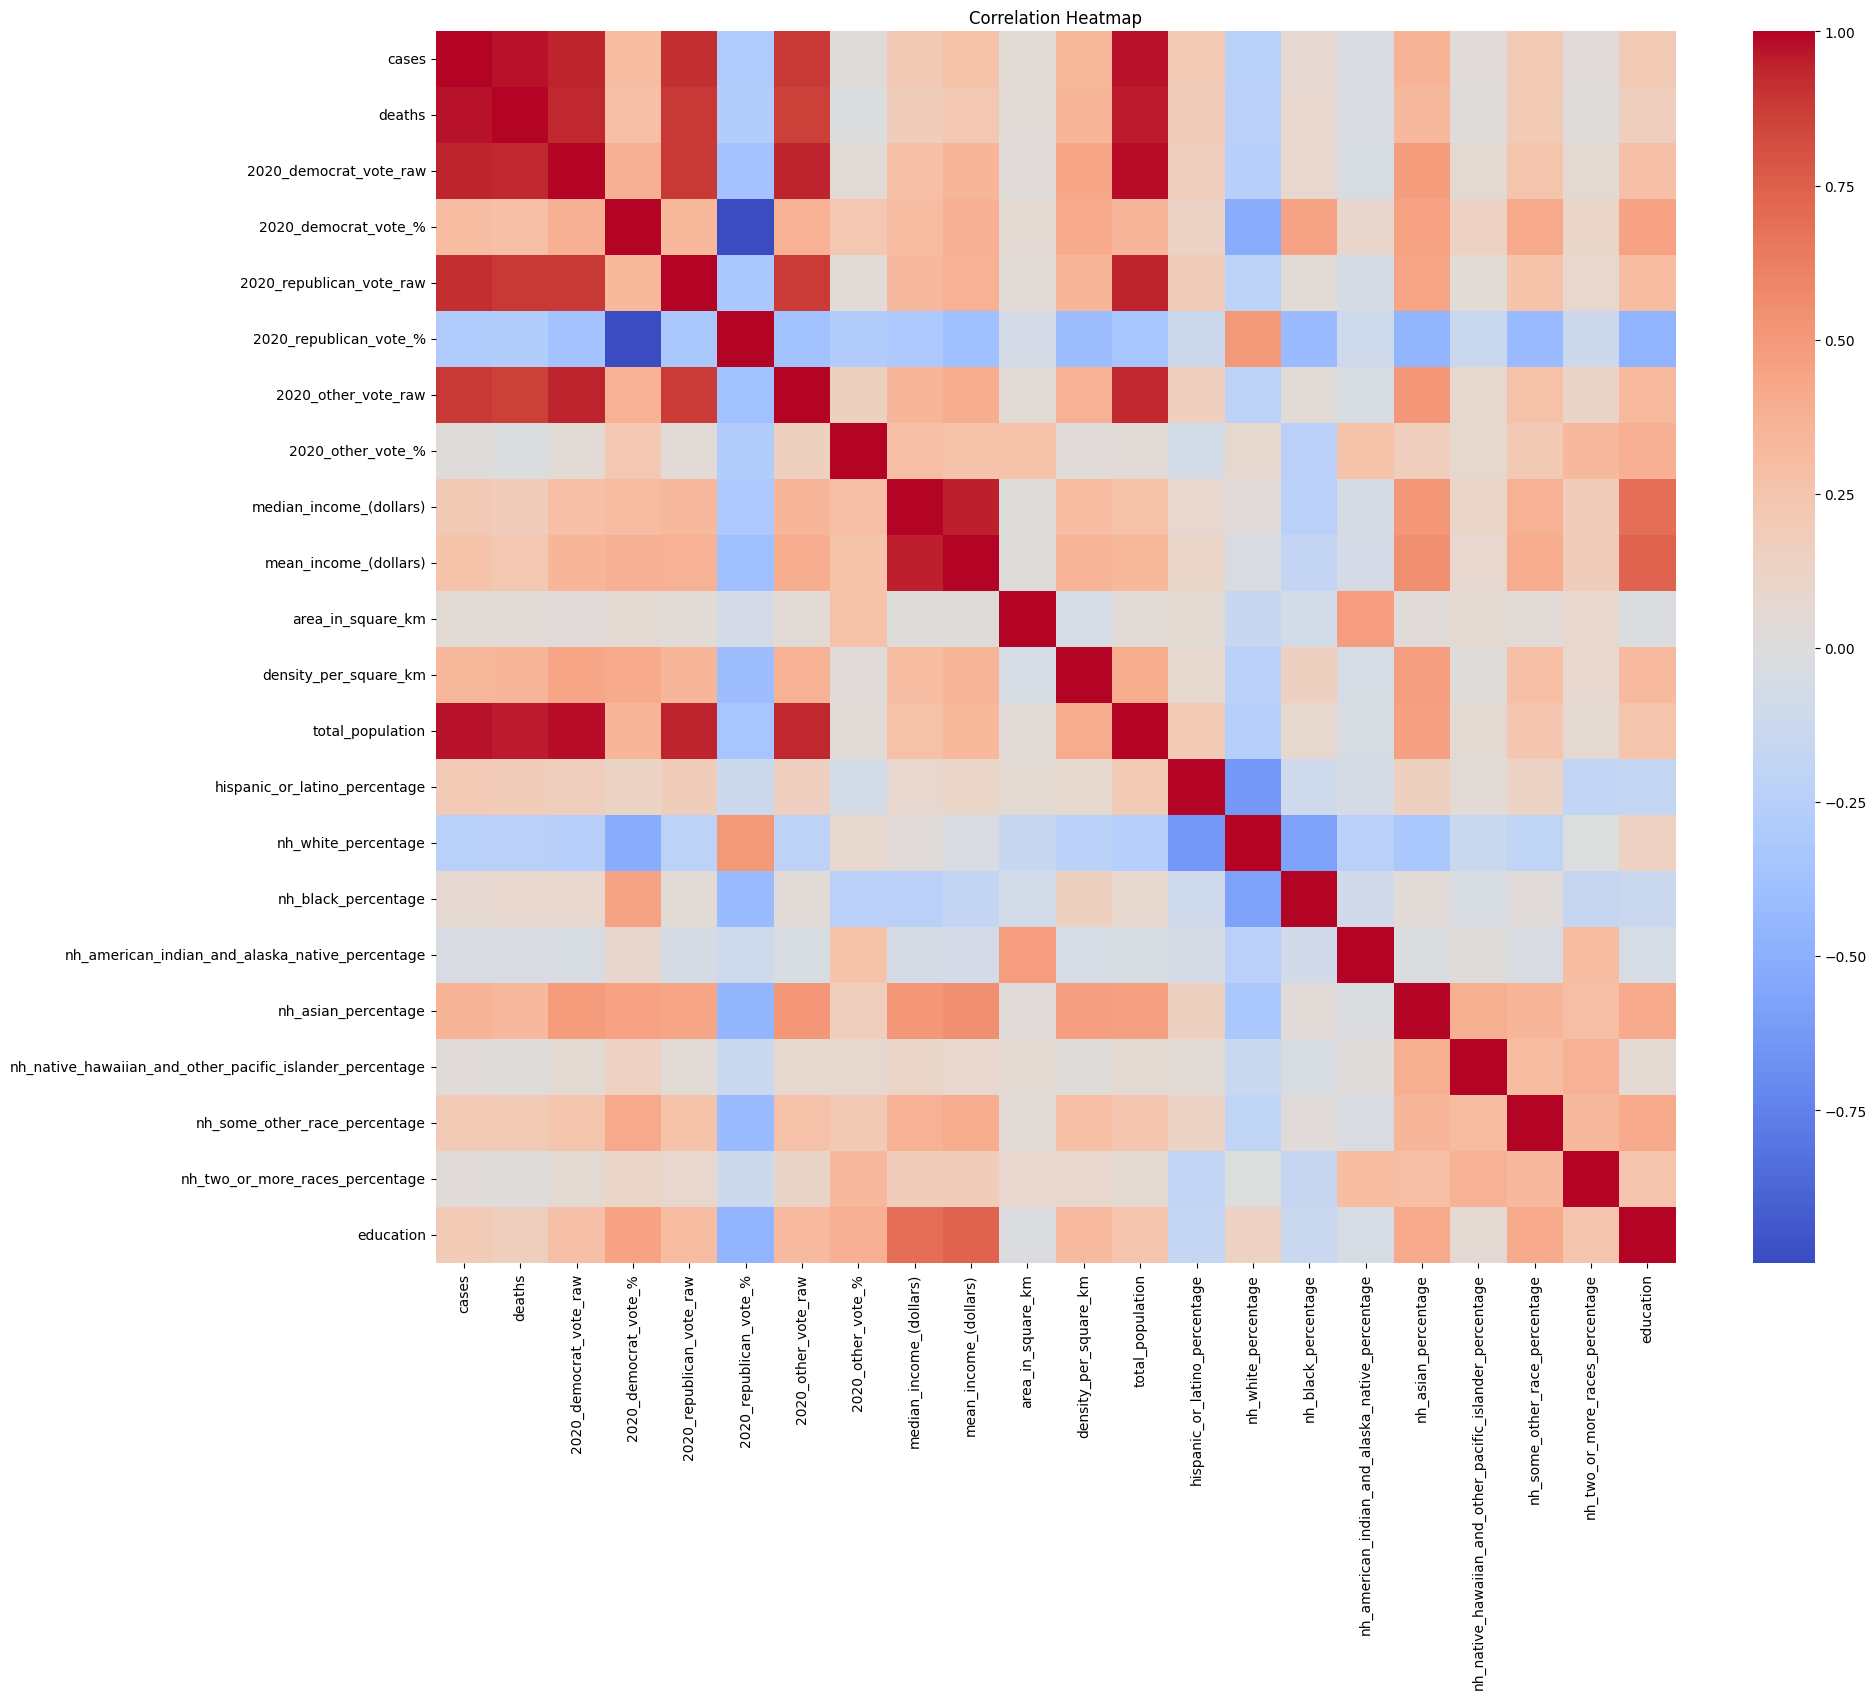

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

#numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

merged_numeric = merged_clean.drop(columns=["county", "state"])
# Compute the correlation matrix
corr_matrix = merged_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Some very interesting findings. Some variables do appear to be heavily correlated, so let's intentionally list those out for easier viewing/understanding.

In [183]:
corr_matrix.head()

,cases,deaths,2020_democrat_vote_raw,2020_democrat_vote_%,2020_republican_vote_raw,2020_republican_vote_%,2020_other_vote_raw,2020_other_vote_%,median_income_(dollars),mean_income_(dollars),...,total_population,hispanic_or_latino_percentage,nh_white_percentage,nh_black_percentage,nh_american_indian_and_alaska_native_percentage,nh_asian_percentage,nh_native_hawaiian_and_other_pacific_islander_percentage,nh_some_other_race_percentage,nh_two_or_more_races_percentage,education
cases,1.000000,0.973975,0.942177,0.297804,0.920084,-0.294855,0.886824,0.022275,0.212801,0.262926,...,0.976458,0.207978,-0.248282,0.070405,-0.035788,0.367136,0.029402,0.205346,0.029329,0.200424
deaths,0.973975,1.000000,0.934337,0.284520,0.887149,-0.280080,0.859564,-0.008475,0.174011,0.225591,...,0.956512,0.195206,-0.239897,0.083581,-0.034127,0.322894,0.012682,0.199896,0.010487,0.165020
2020_democrat_vote_raw,0.942177,0.934337,1.000000,0.376273,0.885700,-0.373422,0.943163,0.044210,0.288407,0.349025,...,0.978976,0.168654,-0.249634,0.082770,-0.039219,0.488519,0.047690,0.249167,0.061137,0.276444
2020_democrat_vote_%,0.297804,0.284520,0.376273,1.000000,0.328838,-0.998592,0.373598,0.230301,0.304148,0.376776,...,0.346390,0.123391,-0.517212,0.446455,0.088488,0.460616,0.133469,0.416681,0.106935,0.459769
2020_republican_vote_raw,0.920084,0.887149,0.885700,0.328838,1.000000,-0.326374,0.882308,0.039186,0.324343,0.374065,...,0.940000,0.178659,-0.221381,0.046378,-0.055278,0.441315,0.043925,0.259483,0.084537,0.303692


In [184]:
print("Democratic vote % correlations:")
print(corr_matrix["2020_democrat_vote_%"].sort_values(ascending=False))
print("\nRepublican vote % correlations:")
print(corr_matrix["2020_republican_vote_%"].sort_values(ascending=False))

Democratic vote % correlations:
2020_democrat_vote_%                                        1.000000
nh_asian_percentage                                         0.460616
education                                                   0.459769
nh_black_percentage                                         0.446455
nh_some_other_race_percentage                               0.416681
density_per_square_km                                       0.409792
mean_income_(dollars)                                       0.376776
2020_democrat_vote_raw                                      0.376273
2020_other_vote_raw                                         0.373598
total_population                                            0.346390
2020_republican_vote_raw                                    0.328838
median_income_(dollars)                                     0.304148
cases                                                       0.297804
deaths                                                      0.284520
20

Correlation values aren't amazing, let's see if there are any outliers we can remove to improve the accuracy of future models.

In [185]:
#isolation forest
from sklearn.ensemble import IsolationForest

#remove observations with NaN (only 1 removed)
merged_clean = merged_clean.drop(columns=["county", "state"]).dropna()

merged_clean_iso_tree = merged_clean

#create isolation forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
#predict outliers
merged_clean_iso_tree["outliers"] = iso_forest.fit_predict(merged_clean_iso_tree)

#outliers classified as -1
outliers = merged_clean_iso_tree[merged_clean_iso_tree["outliers"] == -1]

In [186]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 20 to 2615
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   cases                                                     131 non-null    int64  
 1   deaths                                                    131 non-null    float64
 2   2020_democrat_vote_raw                                    131 non-null    int64  
 3   2020_democrat_vote_%                                      131 non-null    float64
 4   2020_republican_vote_raw                                  131 non-null    int64  
 5   2020_republican_vote_%                                    131 non-null    float64
 6   2020_other_vote_raw                                       131 non-null    int64  
 7   2020_other_vote_%                                         131 non-null    float64
 8   median_income_(dollars)

Isolation forest suggests there are 128 counties that are outliers. Lets remove them from the dataframe (as a new dataframe that just doesn't contain the outliers) then show the correlation matrix, to see if it improves.

In [187]:
#not going to do the plot because there's too many variables to
#really learn anything from it

#drop outliers
merged_clean_no_outliers = merged_clean_iso_tree[merged_clean_iso_tree["outliers"] != -1]

# Compute the correlation matrix
corr_matrix_no_outliers = merged_clean_no_outliers.corr()

print("Democratic vote % correlations:")
print(corr_matrix_no_outliers["2020_democrat_vote_%"].sort_values(ascending=False))
print("\nRepublican vote % correlations:")
print(corr_matrix_no_outliers["2020_republican_vote_%"].sort_values(ascending=False))


Democratic vote % correlations:
2020_democrat_vote_%                                        1.000000
2020_democrat_vote_raw                                      0.475040
nh_black_percentage                                         0.462176
nh_asian_percentage                                         0.438997
2020_other_vote_raw                                         0.430102
education                                                   0.411703
total_population                                            0.399076
density_per_square_km                                       0.383295
nh_some_other_race_percentage                               0.373623
cases                                                       0.361850
deaths                                                      0.312424
2020_republican_vote_raw                                    0.301822
mean_income_(dollars)                                       0.262764
2020_other_vote_%                                           0.233842
me

Need to make some general plots of data (according to rubric). Try to use grpahs to justify decisions that were made. Will come back to do this later, for now let's get to modeling.


# **Model Selection & Training**
We begin by selecting features and targets. We'll start by using all the features, then use less features over time. We'll also use the dataframe without outliers, then use the one with the outliers. Just building different models to see which ones perform the best.

In [188]:
merged_clean_no_covid = merged_clean.drop(columns=["cases", "deaths"])

In [189]:
not_feature_columns = ["2020_republican_vote_%", "2020_democrat_vote_%",
                   "2020_democrat_vote_raw", "2020_republican_vote_raw",
                   "2020_other_vote_%", "2020_other_vote_raw"]

top_5_dem = ["nh_black_percentage", "nh_asian_percentage", "education", "total_population", "density_per_square_km"]

X = merged_clean.drop(columns=not_feature_columns)
y = merged_clean[["2020_democrat_vote_%", "2020_republican_vote_%"]]

y2 = merged_clean[["2020_democrat_vote_%"]]#just predict dems?

X_no_outliers = merged_clean_no_outliers.drop(columns=not_feature_columns)
y_no_outliers = merged_clean_no_outliers[["2020_democrat_vote_%", "2020_republican_vote_%"]]

X_no_outliers2 = merged_clean_no_outliers.drop(columns=not_feature_columns)
y_no_outliers2 = merged_clean_no_outliers[["2020_democrat_vote_%"]]

X_top_5_dem = merged_clean[top_5_dem]
y_top_5_dem = merged_clean["2020_democrat_vote_%"]

#will be used later to convert array to df
feature_names = X.columns.tolist()

Now we'll split the datasets and check the shapes of each to make sure they're about the same.

In [190]:
#data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


#model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [191]:
#80%- training, 20%- testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y2, test_size=0.2, random_state=42
)

X_train_no_outliers2, X_test_no_outliers2, y_train_no_outliers2, y_test_no_outliers2 = train_test_split(
    X_no_outliers2, y_no_outliers2, test_size=0.2, random_state=42
)

X_train_top_5_dem, X_test_top_5_dem, y_train_top_5_dem, y_test_top_5_dem = train_test_split(
    X_top_5_dem, y_top_5_dem, test_size=0.2, random_state=42
)

print(f"\nTraining Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Targets Shape: {y_train.shape}")
print(f"Testing Targets Shape: {y_test.shape}")


Training Features Shape: (2095, 17)
Testing Features Shape: (524, 17)
Training Targets Shape: (2095, 2)
Testing Targets Shape: (524, 2)


Splits look good, now we normalize the features.

In [192]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled features back to DataFrame for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

# Fit the scaler on training data and transform both training and testing data
X_train_scaled_no_outliers = scaler.fit_transform(X_train_no_outliers)
X_test_scaled_no_outliers = scaler.transform(X_test_no_outliers)

# Convert the scaled features back to DataFrame for easier handling (optional)
X_train_scaled_no_outliers = pd.DataFrame(X_train_scaled_no_outliers, columns = feature_names)
X_test_scaled_no_outliers = pd.DataFrame(X_test_scaled_no_outliers, columns = feature_names)

# Fit the scaler on training data and transform both training and testing data
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

# Convert the scaled features back to DataFrame for easier handling (optional)
X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns = feature_names)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns = feature_names)

# Fit the scaler on training data and transform both training and testing data
X_train_scaled_no_outliers2 = scaler.fit_transform(X_train_no_outliers2)
X_test_scaled_no_outliers2 = scaler.transform(X_test_no_outliers2)

# Convert the scaled features back to DataFrame for easier handling (optional)
X_train_scaled_no_outliers2 = pd.DataFrame(X_train_scaled_no_outliers2, columns = feature_names)
X_test_scaled_no_outliers2 = pd.DataFrame(X_test_scaled_no_outliers2, columns = feature_names)

# Fit the scaler on training data and transform both training and testing data
X_train_scaled_top_5_dem = scaler.fit_transform(X_train_top_5_dem)
X_test_scaled_top_5_dem = scaler.transform(X_test_top_5_dem)

# Convert the scaled features back to DataFrame for easier handling (optional)
X_train_scaled_top_5_dem = pd.DataFrame(X_train_scaled_top_5_dem, columns = top_5_dem)
X_test_scaled_top_5_dem = pd.DataFrame(X_test_scaled_top_5_dem, columns = top_5_dem)


X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 17 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   cases                                                     2095 non-null   float64
 1   deaths                                                    2095 non-null   float64
 2   median_income_(dollars)                                   2095 non-null   float64
 3   mean_income_(dollars)                                     2095 non-null   float64
 4   area_in_square_km                                         2095 non-null   float64
 5   density_per_square_km                                     2095 non-null   float64
 6   total_population                                          2095 non-null   float64
 7   hispanic_or_latino_percentage                             2095 non-null   float64
 8   nh_white_percentag

Create the model

In [193]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(17,)),  # Input layer (17 features)
    Dropout(0.3),                                     # Dropout to prevent overfitting
    Dense(32, activation='relu'),                     # Hidden layer 1
    Dropout(0.2),                                     # Dropout
    Dense(16, activation='relu'),                     # Hidden layer 2
    Dense(2, activation='linear')                     # Output layer (2 outputs for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae']  # Mean Absolute Error
)

# Display the model summary
print("\nNeural Network Model Summary:")
model.summary()


Neural Network Model Summary:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_218 (Dense)                    │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_109 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_219 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_110 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_220 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,794 (14.82 KB)

 Trainable params: 3,794 (14.82 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [194]:
# Define early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 2852.5403 - mae: 48.3569 - val_loss: 2272.8767 - val_mae: 43.4075
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1800.8114 - mae: 37.5942 - val_loss: 508.8885 - val_mae: 17.2170
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 608.1971 - mae: 18.6678 - val_loss: 358.7507 - val_mae: 14.6013
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 436.1598 - mae: 16.2929 - val_loss: 294.6686 - val_mae: 13.1514
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 372.3461 - mae: 15.1124 - val_loss: 241.8430 - val_mae: 11.8720
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 325.4429 - mae: 13.8360 - val_loss: 212.7349 - val_mae: 11.0557
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 274.4353 - mae: 12.6990 - val_loss: 187.7597 - val_mae: 10.2521
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 268.8013 - mae: 12.4326 - val_loss: 172.2877 - val_mae: 9.8681
Epoch 9/100


Evaluate Model

In [195]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"\nTest Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

#first try (straightforward ReLu)- 74.84071350097656, 6.581586837768555

17/17 - 0s - 2ms/step - loss: 68.3587 - mae: 6.3341

Test Mean Squared Error (MSE): 68.35868072509766
Test Mean Absolute Error (MAE): 6.334124565124512
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


relu activation method worked pretty well, but it's time to do some experimenting. In the following section I create lots of models using different activation methods, early stop functions, call backs, with and without outliers- just experimenting to find the best model possible. I will put the following section under a header that can be minimized, and report back the most successfull model.

# **Model Experimentation**

In [196]:
model = Sequential([
    Dense(64, activation='swish', input_shape=(17,)),  # Input layer (17 features)
    Dropout(0.3),                                     # Dropout to prevent overfitting
    Dense(32, activation='swish'),                     # Hidden layer 1
    Dropout(0.2),                                     # Dropout
    Dense(16, activation='swish'),                     # Hidden layer 2
    Dense(2, activation='linear')                     # Output layer (2 outputs for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'accuracy']  # Mean Absolute Error
)

# Define early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0

)

# Evaluate the model on the test set
test_loss, test_mae, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"\nTest Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 - 0s - 2ms/step - accuracy: 0.9179 - loss: 63.3027 - mae: 6.1839

Test Mean Squared Error (MSE): 63.30272674560547
Test Mean Absolute Error (MAE): 6.183919906616211
Test Accuracy: 0.9179389476776123
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [197]:
#using swish, removing outliers
model = Sequential([
    Dense(64, activation='swish', input_shape=(17,)),  # Input layer (17 features)
    Dropout(0.3),                                     # Dropout to prevent overfitting
    Dense(32, activation='swish'),                     # Hidden layer 1
    Dropout(0.2),                                     # Dropout
    Dense(16, activation='swish'),                     # Hidden layer 2
    Dense(2, activation='linear')                     # Output layer (2 outputs for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'accuracy']  # Mean Absolute Error
)

# Define early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled_no_outliers, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0

)

# Evaluate the model on the test set
test_loss, test_mae, test_accuracy= model.evaluate(X_test_scaled_no_outliers, y_test_no_outliers, verbose=2)
print(f"\nTest Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled_no_outliers)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 - 0s - 2ms/step - accuracy: 0.8855 - loss: 210.2968 - mae: 11.6716

Test Mean Squared Error (MSE): 210.2967529296875
Test Mean Absolute Error (MAE): 11.671618461608887
Test Accuracy: 0.8855421543121338
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [198]:
#using relu, removing outliers
model = Sequential([
    Dense(64, activation='relu', input_shape=(17,)),  # Input layer (17 features)
    Dropout(0.3),                                     # Dropout to prevent overfitting
    Dense(32, activation='relu'),                     # Hidden layer 1
    Dropout(0.2),                                     # Dropout
    Dense(16, activation='relu'),                     # Hidden layer 2
    Dense(2, activation='linear')                     # Output layer (2 outputs for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'accuracy']  # Mean Absolute Error
)

# Define early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled_no_outliers, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0

)

# Evaluate the model on the test set
test_loss, test_mae, test_accuracy = model.evaluate(X_test_scaled_no_outliers, y_test_no_outliers, verbose=2)
print(f"\nTest Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled_no_outliers)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 - 0s - 2ms/step - accuracy: 0.8855 - loss: 213.2790 - mae: 11.8082

Test Mean Squared Error (MSE): 213.27896118164062
Test Mean Absolute Error (MAE): 11.808197021484375
Test Accuracy: 0.8855421543121338
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [199]:
#using relu, just predicting dem %
model = Sequential([
    Dense(64, activation='relu', input_shape=(17,)),  # Input layer (17 features)
    Dropout(0.3),                                     # Dropout to prevent overfitting
    Dense(32, activation='relu'),                     # Hidden layer 1
    Dropout(0.2),                                     # Dropout
    Dense(16, activation='relu'),                     # Hidden layer 2
    Dense(1, activation='linear')                     # Output layer (2 outputs for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'accuracy']  # Mean Absolute Error
)

# Define early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled2, y_train2,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0

)

test_loss, test_mae, test_accuracy = model.evaluate(X_test_scaled2, y_test2, verbose=2)
print(f"\nTest Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 68.1159 - mae: 6.2277

Test Mean Squared Error (MSE): 68.11587524414062
Test Mean Absolute Error (MAE): 6.227700710296631
Test Accuracy: 0.0
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [200]:
#using swish, just predicting dem %
model = Sequential([
    Dense(64, activation='swish', input_shape=(17,)),  # Input layer (17 features)
    Dropout(0.3),                                     # Dropout to prevent overfitting
    Dense(32, activation='swish'),                     # Hidden layer 1
    Dropout(0.2),                                     # Dropout
    Dense(16, activation='swish'),                     # Hidden layer 2
    Dense(1, activation='linear')                     # Output layer (2 outputs for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'accuracy']  # Mean Absolute Error
)

# Define early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled2, y_train2,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0

)

# Evaluate the model on the test set
test_loss, test_mae, test_accuracy = model.evaluate(X_test_scaled2, y_test2, verbose=2)
print(f"\nTest Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: 60.5853 - mae: 5.9148

Test Mean Squared Error (MSE): 60.58525466918945
Test Mean Absolute Error (MAE): 5.91478967666626
Test Accuracy: 0.0
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [201]:
#using relu, just predicting dem % with no outliers
###################BEST ONE YET, NO OUTLIERS VERY GOOD WHEN JUST PREDICTING DEM%
model = Sequential([
    Dense(64, activation='relu', input_shape=(17,)),  # Input layer (17 features)
    Dropout(0.3),                                     # Dropout to prevent overfitting
    Dense(32, activation='relu'),                     # Hidden layer 1
    Dropout(0.2),                                     # Dropout
    Dense(16, activation='relu'),                     # Hidden layer 2
    Dense(1, activation='linear')                     # Output layer (2 outputs for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'accuracy']  # Mean Absolute Error
)

# Define early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled_no_outliers2, y_train_no_outliers2,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0

)

# Evaluate the model on the test set
test_loss, test_mae, test_accuracy = model.evaluate(X_test_scaled_no_outliers2, y_test_no_outliers2, verbose=2)
print(f"\nTest Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Accuracy: {test_accuracy}")

y_test_final = y_test_no_outliers2

# Make predictions on the test set
y_pred_best = model.predict(X_test_scaled_no_outliers2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 74.0192 - mae: 6.6043

Test Mean Squared Error (MSE): 74.01917266845703
Test Mean Absolute Error (MAE): 6.604316234588623
Test Accuracy: 0.0
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [202]:
#using relu, predicting dem% with top 5 correlated values, reduced epochs for simpler data
#meh
model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),  # Input layer (17 features)
    Dropout(0.3),                                     # Dropout to prevent overfitting
    Dense(32, activation='relu'),                     # Hidden layer 1
    Dropout(0.2),                                     # Dropout
    Dense(16, activation='relu'),                     # Hidden layer 2
    Dense(1, activation='linear')                     # Output layer (2 outputs for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'accuracy']  # Mean Absolute Error
)

# Define early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled_top_5_dem, y_train_top_5_dem,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0

)

# Evaluate the model on the test set
test_loss, test_mae, test_accuracy = model.evaluate(X_test_scaled_top_5_dem, y_test_top_5_dem, verbose=2)
print(f"\nTest Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled_top_5_dem)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 93.1333 - mae: 7.2673

Test Mean Squared Error (MSE): 93.13333129882812
Test Mean Absolute Error (MAE): 7.267295837402344
Test Accuracy: 0.0
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [203]:
#using swish, predicting dem% with top 5 correlated values, reduced epochs for simpler data
#meh, better than same with relu
model = Sequential([
    Dense(64, activation='swish', input_shape=(5,)),  # Input layer (17 features)
    Dropout(0.3),                                     # Dropout to prevent overfitting
    Dense(32, activation='swish'),                     # Hidden layer 1
    Dropout(0.2),                                     # Dropout
    Dense(16, activation='swish'),                     # Hidden layer 2
    Dense(1, activation='linear')                     # Output layer (2 outputs for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'accuracy']  # Mean Absolute Error
)

# Define early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled_top_5_dem, y_train_top_5_dem,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0

)

# Evaluate the model on the test set
test_loss, test_mae, test_accuracy = model.evaluate(X_test_scaled_top_5_dem, y_test_top_5_dem, verbose=2)
print(f"\nTest Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled_top_5_dem)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 87.3235 - mae: 6.9386

Test Mean Squared Error (MSE): 87.32347106933594
Test Mean Absolute Error (MAE): 6.938608646392822
Test Accuracy: 0.0
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [204]:
#using relu, just predicting dem % with no outliers
#almost identical output to above (slightly better) #####
model = Sequential([
    Dense(64, activation='swish', input_shape=(17,)),  # Input layer (17 features)
    Dropout(0.3),                                     # Dropout to prevent overfitting
    Dense(32, activation='swish'),                     # Hidden layer 1
    Dropout(0.2),                                     # Dropout
    Dense(16, activation='swish'),                     # Hidden layer 2
    Dense(1, activation='linear')                     # Output layer (2 outputs for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'accuracy']  # Mean Absolute Error
)

# Define early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled_no_outliers2, y_train_no_outliers2,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0

)

# Evaluate the model on the test set
test_loss, test_mae, test_accuracy = model.evaluate(X_test_scaled_no_outliers2, y_test_no_outliers2, verbose=2)
print(f"\nTest Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled_no_outliers2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: 54.9967 - mae: 5.7970

Test Mean Squared Error (MSE): 54.9967041015625
Test Mean Absolute Error (MAE): 5.796965599060059
Test Accuracy: 0.0
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


# **Exploring Different Models**
After lots of experimentation, we found the best machine learning model used "swish" activation, just predicted the democratic percentage, and did not include the outliers from the original dataset. This resuled in a MSE of 55 and a MAE of 5.8. Considering how poorly correlated the variables were, this is pretty solid. Note that the accuracy for many of the models above is 0 because only one target is being predicted for those models, so accuracy cannot be calculated.

Now we seek so explore some different models. We will begin with a simple linear regression model based on the most correlated data. We will also treat the democratic voting % as a binary classification and seek to predict if the % is > 50%.

In [205]:
x_train, x_test, y_train, y_test = train_test_split(merged_clean_no_outliers[top_5_dem], merged_clean_no_outliers['2020_democrat_vote_%'], test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("r^2: ", r2)
mse = mean_squared_error(y_test, y_pred)
print("mse: ", mse)

r^2:  0.5233659223454227
mse:  100.01405295577123


Pretty poor scores, but that makes sense as it reflects that they are poorly correlated values. Now we'll create a binary classification model to see how it performs.

In [206]:
merged_clean2 = merged_clean.copy()
merged_clean2['above_50'] = (merged_clean['2020_democrat_vote_%'] > 50).astype(int)

not_feature_columns2 = ["2020_republican_vote_%", "2020_democrat_vote_%",
                   "2020_democrat_vote_raw", "2020_republican_vote_raw",
                   "2020_other_vote_%", "2020_other_vote_raw", 'above_50']

X = merged_clean2.drop(columns=not_feature_columns2)
y = merged_clean2["above_50"]

feature_names = X.columns.to_list()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled features back to DataFrame for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)


In [207]:
#use sigmoid for binary classification
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(17,)),  # Input layer (17 features)
    Dropout(0.3),                                     # Dropout to prevent overfitting
    Dense(32, activation='sigmoid'),                     # Hidden layer 1
    Dropout(0.2),                                     # Dropout
    Dense(16, activation='sigmoid'),                     # Hidden layer 2
    Dense(1, activation='linear')                     # Output layer (2 outputs for regression)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'accuracy', tf.keras.metrics.F1Score()]  # Mean Absolute Error
)

# Define early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0

)

# Evaluate the model on the test set
test_loss, test_mae, test_accuracy, test_f1 = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"\nTest Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1: {test_f1}")


# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 - 0s - 3ms/step - accuracy: 0.9179 - f1_score: 0.2533 - loss: 0.0567 - mae: 0.1140

Test Mean Squared Error (MSE): 0.05674782022833824
Test Mean Absolute Error (MAE): 0.11396533995866776
Test Accuracy: 0.9179389476776123
Test F1: 0.25333333015441895
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


This model appears to be extremely accurate, but has struggles with either recall, precision, or both, according to the low F1 score. We can now plot the original model in experimentation we found to have the lowers MSE & MAE to visualize its accuracy in predict the 2020 democratic vote percentage.

In [208]:
#y_test_final
#y_pred_best

fix_columns = y_test_final.reset_index(drop=True)

mse = mean_squared_error(fix_columns, y_pred_best)
mae = mean_absolute_error(fix_columns, y_pred_best)
r2 = r2_score(fix_columns, y_pred_best)

#more evaluation metrics
print(f"\nOverall Test Mean Squared Error (MSE): {mse}")
print(f"Overall Test Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}") #solid R^2 score, especially given correlation values
fix_columns.info()


Overall Test Mean Squared Error (MSE): 74.019169390843
Overall Test Mean Absolute Error (MAE): 6.604316977152384
R² Score: 0.6429877281188965
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   2020_democrat_vote_%  498 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


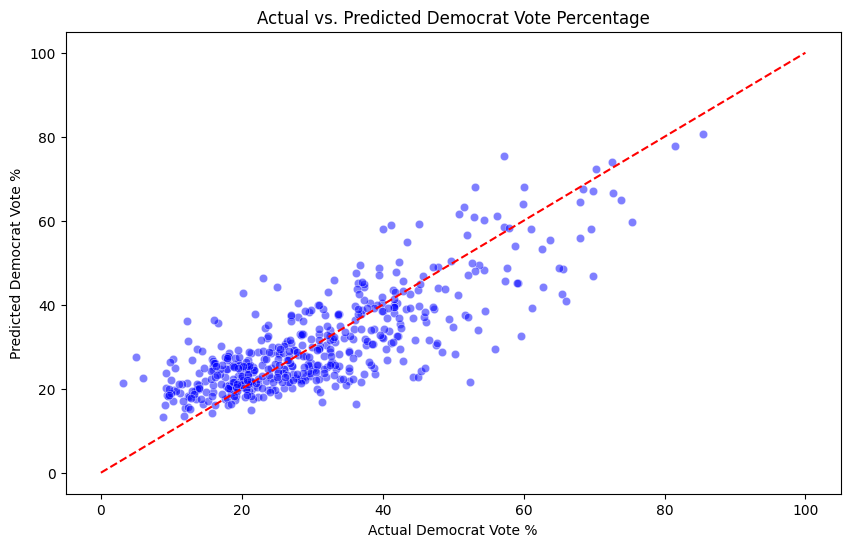

In [209]:
# Scatter plot for Democrat Vote Percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fix_columns['2020_democrat_vote_%'], y=y_pred_best[:, 0], alpha=0.5, color='blue')
plt.plot([0, 100], [0, 100], 'r--')  # Diagonal line for reference
plt.title('Actual vs. Predicted Democrat Vote Percentage')
plt.xlabel('Actual Democrat Vote %')
plt.ylabel('Predicted Democrat Vote %')
plt.show()